# **Importing Necessary Libraries**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [2]:
df = pd.read_csv("monster_train.csv")
df.head()

,id,class,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,1,Zombie,61.624796,green,24.37,25.009,0.153880,3.331372
1,2,Ghost,51.408600,white,3.52,7.211,0.210933,3.314029
2,3,Witch,61.419138,purple,22.78,19.478,0.174245,3.481500
3,4,Zombie,52.970681,green,29.82,23.499,0.169031,3.335083
4,5,Witch,57.270176,purple,27.25,13.082,0.215114,3.041551


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37497 entries, 0 to 37496
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               37497 non-null  int64  
 1   class            37497 non-null  object 
 2   height           37497 non-null  float64
 3   color            37497 non-null  object 
 4   rottingFleshPct  37497 non-null  float64
 5   bloodCoverage    37497 non-null  float64
 6   aura             37497 non-null  float64
 7   hairLength       37497 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.3+ MB


In [4]:
df.shape

(37497, 8)

In [5]:
df.describe()

,id,height,rottingFleshPct,bloodCoverage,aura,hairLength
count,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000,37497.000000
mean,18749.000000,60.479933,20.978922,19.280995,0.197489,3.469250
std,10824.595859,7.755619,10.222874,12.005198,0.084560,0.418789
min,1.000000,22.124607,1.530000,-2.634000,0.020161,1.943124
25%,9375.000000,56.413659,11.540000,8.598000,0.120640,3.186231
50%,18749.000000,62.041574,22.000000,18.667000,0.195185,3.472094
75%,28123.000000,66.017655,29.500000,28.981000,0.250105,3.751260
max,37497.000000,83.070259,48.770000,58.864000,0.540366,5.388365


# **Checking for NULL Values**

---



In [6]:
df.isnull().sum()

id                 0
class              0
height             0
color              0
rottingFleshPct    0
bloodCoverage      0
aura               0
hairLength         0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='class', ylabel='count'>

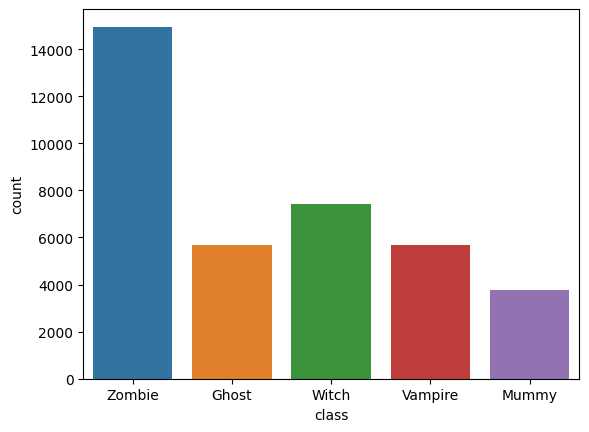

In [7]:
sns.countplot(x="class", data=df)

<Axes: xlabel='bloodCoverage', ylabel='rottingFleshPct'>

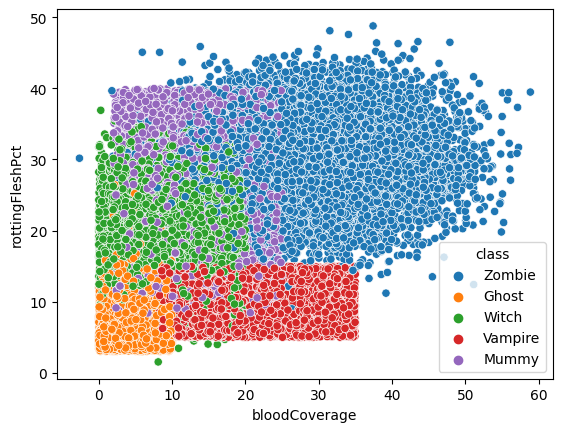

In [9]:
sns.scatterplot(x="bloodCoverage", y="rottingFleshPct",
                data=df, hue="class")

<Axes: xlabel='height', ylabel='aura'>

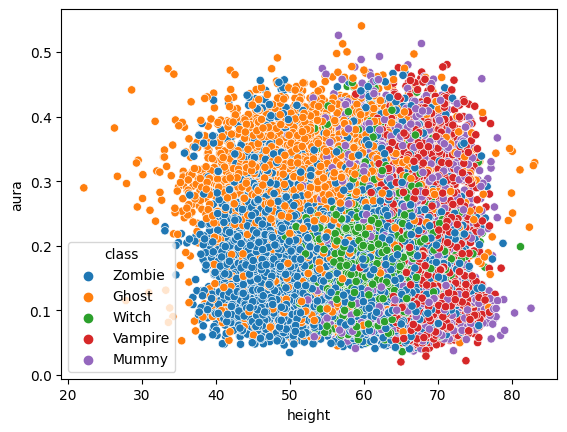

In [10]:
sns.scatterplot(x="height", y="aura", data=df, hue="class")

<Axes: xlabel='color', ylabel='count'>

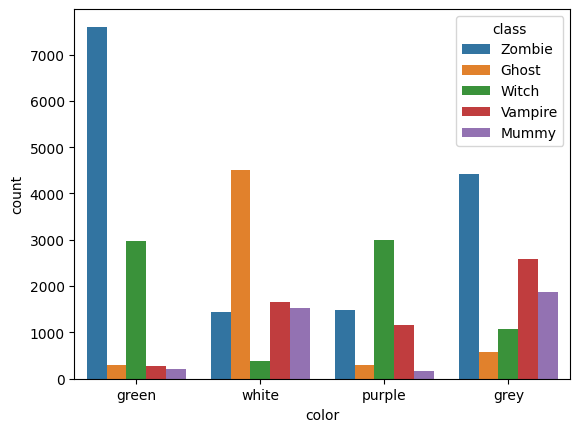

In [16]:
sns.countplot(x="color", data=df, hue="class")

# **Seperating Dependent & Independent Variables**

---



In [20]:
X = df.drop(["id", "class"], axis=1)
y = df["class"]

In [21]:
X.head()

,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,61.624796,green,24.37,25.009,0.153880,3.331372
1,51.408600,white,3.52,7.211,0.210933,3.314029
2,61.419138,purple,22.78,19.478,0.174245,3.481500
3,52.970681,green,29.82,23.499,0.169031,3.335083
4,57.270176,purple,27.25,13.082,0.215114,3.041551


In [22]:
y.head()

0    Zombie
1     Ghost
2     Witch
3    Zombie
4     Witch
Name: class, dtype: object

# **Label Encoding**

---



In [23]:
from sklearn.preprocessing import LabelEncoder
cl_le = LabelEncoder()
class_le = LabelEncoder()

In [24]:
X["color"] = cl_le.fit_transform(X["color"])

In [45]:
X.head()

,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,61.624796,0,24.37,25.009,0.153880,3.331372
1,51.408600,3,3.52,7.211,0.210933,3.314029
2,61.419138,2,22.78,19.478,0.174245,3.481500
3,52.970681,0,29.82,23.499,0.169031,3.335083
4,57.270176,2,27.25,13.082,0.215114,3.041551


In [51]:
y = pd.Series(class_le.fit_transform(y))

In [52]:
y.head()

0    4
1    0
2    3
3    4
4    3
dtype: int64

In [26]:
print(cl_le.classes_)
print(class_le.classes_)

['green' 'grey' 'purple' 'white']
['Ghost' 'Mummy' 'Vampire' 'Witch' 'Zombie']


In [44]:
preds_class = class_le.classes_

# **Splitting into Training & Testing Set**

---



In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29997, 6)
(7500, 6)
(29997,)
(7500,)


# **Model Building - XGB Classifier**

---



In [30]:
from xgboost import XGBClassifier
xgbc_model = XGBClassifier()

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
xgbc_params = {'gamma' :[i/10.0 for i in range(0,5)],
               'max_depth' : [2,4,6,8,10,12,13,15],
               'min_child_weight':[1,2,5,10],
               'max_delta_step':[0,1,2,5,10],
               'subsample' :[i/10.0 for i in range(5,10)],
               'colsample_bytree' :[i/10.0 for i in range(5,10)],
               'colsample_bylevel' :[i/10.0 for i in range(5,10)],
               'n_estimators' : [100,150,200,300]
               }

In [33]:
xgbc_cv = RandomizedSearchCV(estimator=xgbc_model,
                            param_distributions=xgbc_params,
                            cv=10)

In [34]:
xgbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]})

In [35]:
xgbc_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 4,
 'max_delta_step': 1,
 'gamma': 0.4,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.9}

In [40]:
xgbc_model = XGBClassifier( subsample = 0.7,
                           n_estimators = 100,
                            min_child_weight = 5,
                            max_depth = 4,
                            max_delta_step = 1,
                            gamma = 0.4,
                            colsample_bytree = 0.6,
                            colsample_bylevel = 0.9
                            )

In [41]:
xgbc_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=4, max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
xgbc_model.score(X_test, y_test)

0.8973333333333333

# **Model Building - Random Forest Classifier**

---



In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
rfc_params = {'max_depth': list(range(10, 15)),
               'max_features': list(range(2,14))}

In [39]:
rfc_cv = RandomizedSearchCV(estimator=rfc_model,
                            param_distributions=rfc_params,
                            cv=10)

In [43]:
rfc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 11, 12, 13, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13]})

In [48]:
rfc_cv.best_params_

{'max_features': 3, 'max_depth': 12}

In [49]:
rfc_model = RandomForestClassifier(
    max_features=3, max_depth=12
)

In [ ]:
rfc_model.fit(X_train, y_train)

In [53]:
rfc_model.score(X_test, y_test)

0.8994666666666666

# **Testing Data**

---



In [54]:
test_df = pd.read_csv("monster_comp.csv")
test_df.head()

,id,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,1,59.054873,green,15.64,1.825,0.257760,3.324651
1,2,77.670872,white,6.50,25.589,0.380248,3.998308
2,3,67.226096,purple,23.24,3.487,0.140158,3.327609
3,4,66.736155,green,27.80,28.058,0.244492,3.699883
4,5,59.953622,green,32.26,33.037,0.171565,3.464137


In [55]:
test_df.isnull().sum()

id                 0
height             0
color              0
rottingFleshPct    0
bloodCoverage      0
aura               0
hairLength         0
dtype: int64

In [57]:
X_subs = test_df.drop("id", axis=1)

In [58]:
X_subs.head()

,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,59.054873,green,15.64,1.825,0.257760,3.324651
1,77.670872,white,6.50,25.589,0.380248,3.998308
2,67.226096,purple,23.24,3.487,0.140158,3.327609
3,66.736155,green,27.80,28.058,0.244492,3.699883
4,59.953622,green,32.26,33.037,0.171565,3.464137


In [59]:
X_subs["color"] = cl_le.transform(X_subs["color"])

In [60]:
X_subs.head()

,height,color,rottingFleshPct,bloodCoverage,aura,hairLength
0,59.054873,0,15.64,1.825,0.257760,3.324651
1,77.670872,3,6.50,25.589,0.380248,3.998308
2,67.226096,2,23.24,3.487,0.140158,3.327609
3,66.736155,0,27.80,28.058,0.244492,3.699883
4,59.953622,0,32.26,33.037,0.171565,3.464137


# **Submission File - 1**

---



In [70]:
y_preds1 = xgbc_model.predict(X_subs)

In [71]:
y_preds1

array([3, 2, 3, ..., 1, 4, 2])

In [72]:
y_subs1 = list()
for i in range(len(y_preds1)):

  y_subs1.append(preds_class[y_preds1[i]])

In [73]:
y_subs1

['Witch',
 'Vampire',
 'Witch',
 'Zombie',
 'Zombie',
 'Zombie',
 'Witch',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Witch',
 'Zombie',
 'Witch',
 'Mummy',
 'Mummy',
 'Ghost',
 'Ghost',
 'Zombie',
 'Zombie',
 'Witch',
 'Vampire',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Ghost',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Ghost',
 'Vampire',
 'Vampire',
 'Vampire',
 'Zombie',
 'Vampire',
 'Ghost',
 'Vampire',
 'Zombie',
 'Witch',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Zombie',
 'Vampire',
 'Vampire',
 'Zombie',
 'Zombie',
 'Vampire',
 'Witch',
 'Witch',
 'Vampire',
 'Zombie',
 'Mummy',
 'Zombie',
 'Zombie',
 'Witch',
 'Ghost',
 'Zombie',
 'Vampire',
 'Ghost',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Mummy',
 'Ghost',
 'Mummy',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Zombie',
 'Zombie',
 'Mummy',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Zombie',
 'Vampire',
 'Va

In [74]:
subs1_df = pd.DataFrame({
    "id": test_df["id"],
    "class": y_subs1
})

In [75]:
subs1_df.head()

,id,class
0,1,Witch
1,2,Vampire
2,3,Witch
3,4,Zombie
4,5,Zombie


In [76]:
subs1_df.to_csv("submission1.csv", index=False)

# **Submission File - 2**

---



In [77]:
y_preds2 = rfc_model.predict(X_subs)

In [78]:
y_preds2

array([3, 2, 3, ..., 3, 4, 2])

In [79]:
y_subs2 = list()
for i in range(len(y_preds2)):

  y_subs2.append(preds_class[y_preds2[i]])

In [80]:
y_subs2

['Witch',
 'Vampire',
 'Witch',
 'Zombie',
 'Zombie',
 'Zombie',
 'Witch',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Witch',
 'Zombie',
 'Witch',
 'Mummy',
 'Mummy',
 'Ghost',
 'Ghost',
 'Zombie',
 'Zombie',
 'Witch',
 'Vampire',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Ghost',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Ghost',
 'Vampire',
 'Vampire',
 'Vampire',
 'Zombie',
 'Vampire',
 'Ghost',
 'Vampire',
 'Zombie',
 'Witch',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Zombie',
 'Vampire',
 'Vampire',
 'Zombie',
 'Zombie',
 'Vampire',
 'Witch',
 'Witch',
 'Vampire',
 'Zombie',
 'Mummy',
 'Zombie',
 'Zombie',
 'Witch',
 'Ghost',
 'Zombie',
 'Vampire',
 'Ghost',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Mummy',
 'Ghost',
 'Mummy',
 'Zombie',
 'Zombie',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Zombie',
 'Zombie',
 'Mummy',
 'Zombie',
 'Zombie',
 'Vampire',
 'Zombie',
 'Zombie',
 'Vampire',
 'Va

In [81]:
subs2_df = pd.DataFrame({
    "id": test_df["id"],
    "class": y_subs2
})

In [82]:
subs2_df.head()

,id,class
0,1,Witch
1,2,Vampire
2,3,Witch
3,4,Zombie
4,5,Zombie


In [83]:
subs2_df.to_csv("submission2.csv", index=False)